# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [1]:
%matplotlib inline
import pandas as pd

filename = "../../assets/datasets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

# We need to process the dates to be datetime variables
data["sale_date"] = pd.to_datetime(data["sale_date"])

data.head()

/Users/teresaborcuch/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 04:00:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 04:00:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 04:00:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 04:00:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 04:00:00,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with seaborn until you understand each one.

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MEADOW VISTA         1
SLOUGHHOUSE          1
WALNUT GROVE         1
PENRYN               1
MATHER               1
COOL                 1
SHINGLE SPRINGS      1
FORESTHILL           1
DIAMOND SPRINGS      1
GARDEN VALLEY        1
GREENWOOD            1
Name: city, dtype: int64

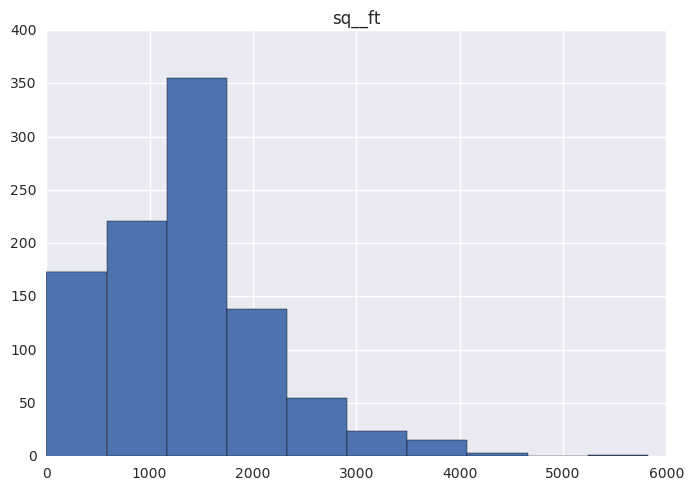

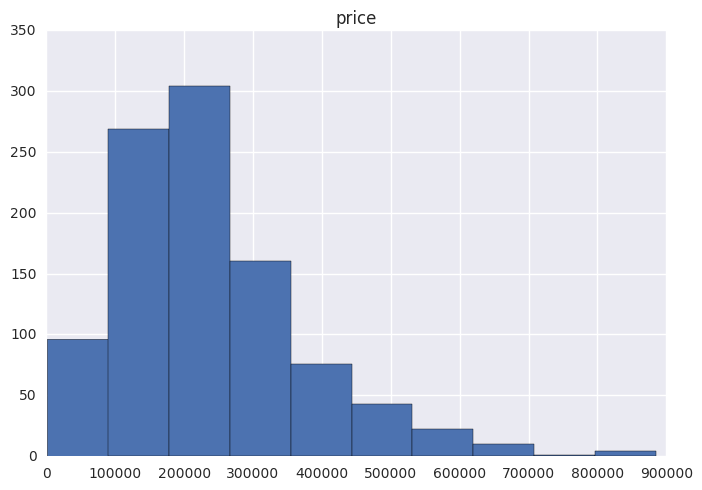

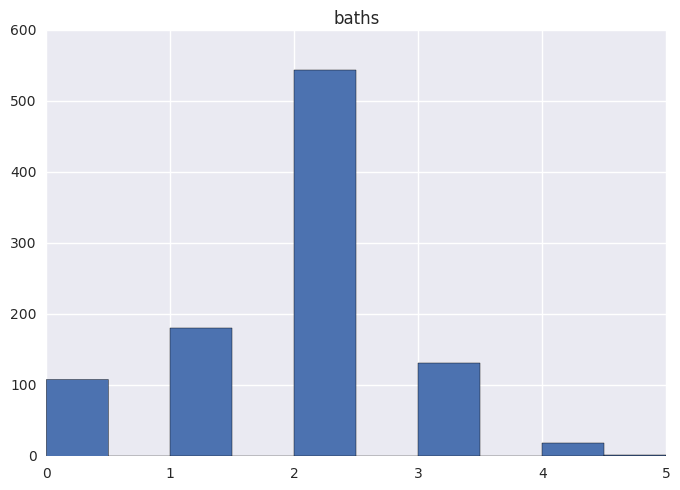

In [49]:
data.hist('sq__ft')
data.hist('price')
data.hist('baths')
data['type'].value_counts()
data['city'].value_counts()

In [22]:
min(data['price'])

1551

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

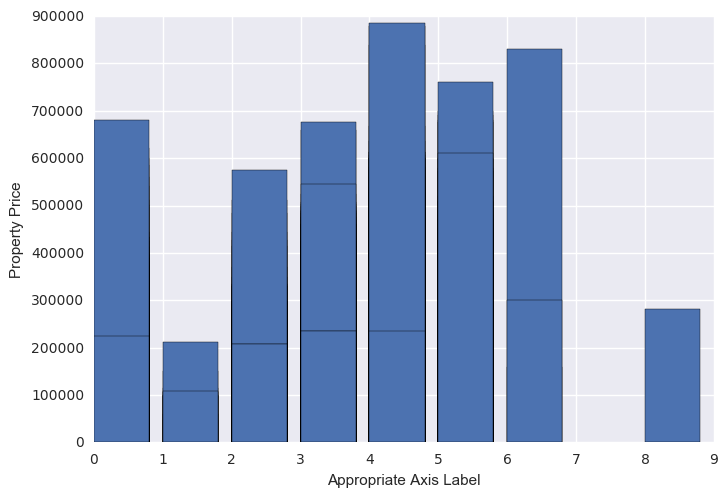

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['beds']
y = data['price']

plt.bar(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

In [66]:
import statsmodels.api as sm
y = data['price']
X = data['beds']
X = sm.add_constant(X)
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()
model1.mse_model

2203769564958.6074

In [57]:
import statsmodels.api as sm
y = data['price']
X = data['zip']
X = sm.add_constant(X)
model2 = sm.OLS(y,X).fit()
predictions = model2.predict(X)
model2.summary()
model2.mse_model

164174987309.11328

In [61]:
import patsy
y,X = patsy.dmatrices('price ~ latitude + longitude', data = data)
model3 = sm.OLS(y,X).fit()
predictions = model3.predict(X)
model3.summary()
model3.mse_model

1011579637882.7822

In [62]:
y,X = patsy.dmatrices('price ~ beds + baths', data = data)
model4 = sm.OLS(y,X).fit()
predictions = model4.predict(X)
model4.mse_model

1633483157285.4023

In [65]:
y,X = patsy.dmatrices('price ~ city + latitude + longitude', data = data)
model5 = sm.OLS(y,X).fit()
predictions = model5.predict(X)
model5.summary()
model5.mse_model

194248203186.93936

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?